In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

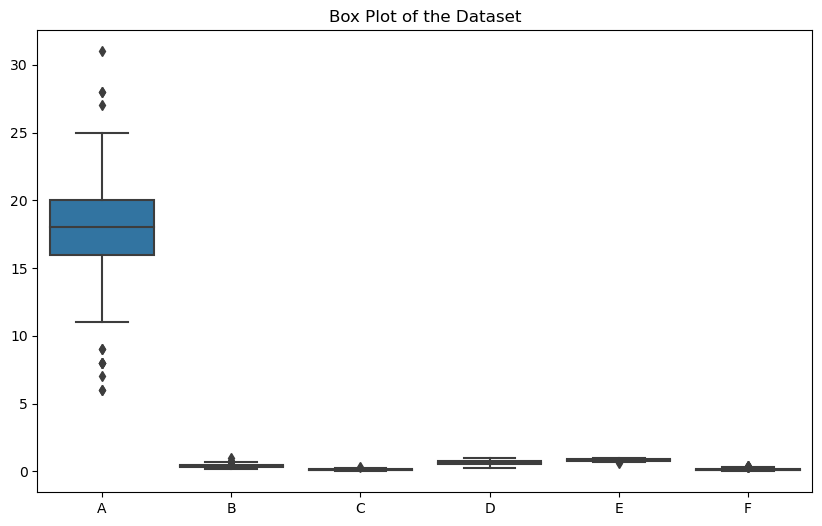

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Alumni Giving Regression (Edited).csv")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of the Dataset")
plt.show()

In [5]:
# Function to identify and count outliers using IQR
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Count and print outliers for each column
for column in df.columns:
    outliers = identify_outliers(column)
    print(f"Column '{column}': {len(outliers)} outliers")


Column 'A': 13 outliers
Column 'B': 7 outliers
Column 'C': 1 outliers
Column 'D': 0 outliers
Column 'E': 1 outliers
Column 'F': 7 outliers


Column 'A': 13 outliers

This suggests that there are 13 data points in Column 'A' that fall significantly outside the expected range based on the IQR. These points may be considered unusual or atypical compared to the majority of the data.
Column 'B': 7 outliers

Similar to Column 'A', Column 'B' has 7 outliers. These values deviate from the typical range observed in the majority of the data.
Column 'C': 1 outlier

Column 'C' has only 1 outlier, suggesting that most of the data in this column is within the expected range, with just a single data point being significantly different.
Column 'D': 0 outliers

There are no outliers in Column 'D', indicating that the values in this column are relatively consistent and do not deviate significantly from the majority of the data.
Column 'E': 1 outlier

Similar to Column 'C', Column 'E' has only 1 outlier, implying that the majority of the data in this column falls within the expected range.
Column 'F': 7 outliers

Column 'F' has 7 outliers, suggesting that certain data points in this column significantly differ from the majority. These values may be considered unusual or anomalous.

Quantile method 1:

Calculates the 99th percentile (quantile) of the first column (iloc[:, 0]) and stores it in quantile99.
Creates a new DataFrame df1 by excluding rows where the values in the first column are greater than the calculated 99th percentile.
Plots a boxplot for the DataFrame df1.

<Axes: >

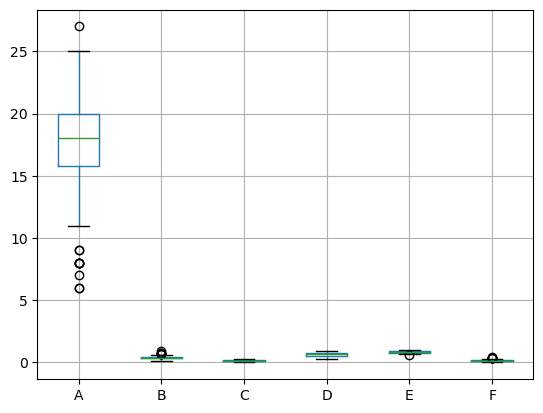

In [15]:
# Calculate the 99th percentile without missing values
quantile99 = df.iloc[:, 0].dropna().quantile(0.99)

# Create a new DataFrame by excluding rows with missing values and values above the 99th percentile
df1 = df[df.iloc[:, 0].dropna() < quantile99]

# Plot a boxplot for the cleaned DataFrame
df1.boxplot()


quantile method 2:
Calculates the 1st percentile (quantile1) and the 99th percentile (quantile99) of the first column.
Creates a new DataFrame df2 by including rows where the values in the first column are greater than the calculated 1st percentile and less than the 99th percentile.
Plots a boxplot for the DataFrame df2.

<Axes: >

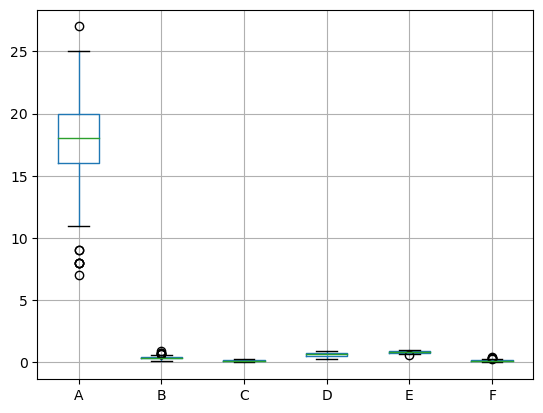

In [16]:
# Calculate the 1st and 99th percentiles without missing values
quantile1 = df.iloc[:, 0].dropna().quantile(0.01)
quantile99 = df.iloc[:, 0].dropna().quantile(0.99)

# Create a new DataFrame by including rows without missing values and values within the 1st and 99th percentiles
df2 = df[(df.iloc[:, 0].dropna() > quantile1) & (df.iloc[:, 0].dropna() < quantile99)]

# Plot a boxplot for the cleaned DataFrame
df2.boxplot()


Differences:
Quantile Calculation:

Method 1 calculates only the 99th percentile.
Method 2 calculates both the 1st and 99th percentiles.

In [17]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Outlier

In [23]:
import pandas as pd


# Drop "NA" values from the DataFrame
df_cleaned = df.dropna()

# Set the quantile threshold
quantile_threshold = 0.99

# Identify the upper bound for each column based on the quantile
upper_bound_quantile = df_cleaned.quantile(quantile_threshold)

# Calculate the lower and upper bounds for each column based on IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the upper bound
outliers = (df_cleaned > upper_bound).any(axis=1)

# Display rows with outliers
print("Rows with outliers:")
print(df_cleaned[outliers])


Rows with outliers:
      A     B     C     D     E     F
2    18  0.24  0.17  0.66  0.87  0.31
3     8  0.74  0.00  0.81  0.88  0.11
4     8  0.95  0.00  0.86  0.92  0.28
15   19  0.46  0.16  0.67  0.85  0.34
23    8  0.71  0.06  0.94  0.97  0.36
27   28  0.23  0.22  0.46  0.81  0.06
65    7  0.75  0.06  0.94  0.97  0.30
68   27  0.33  0.16  0.50  0.78  0.09
72   12  0.55  0.10  0.96  0.98  0.41
82    6  0.69  0.08  0.92  0.97  0.32
87    6  0.70  0.13  0.95  0.98  0.34
91   28  0.23  0.16  0.51  0.86  0.15
103  19  0.34  0.31  0.45  0.68  0.05
106  31  0.28  0.23  0.63  0.86  0.16
108   9  0.63  0.11  0.89  0.97  0.39
110  11  0.70  0.01  0.65  0.88  0.22


# Outliers Removed

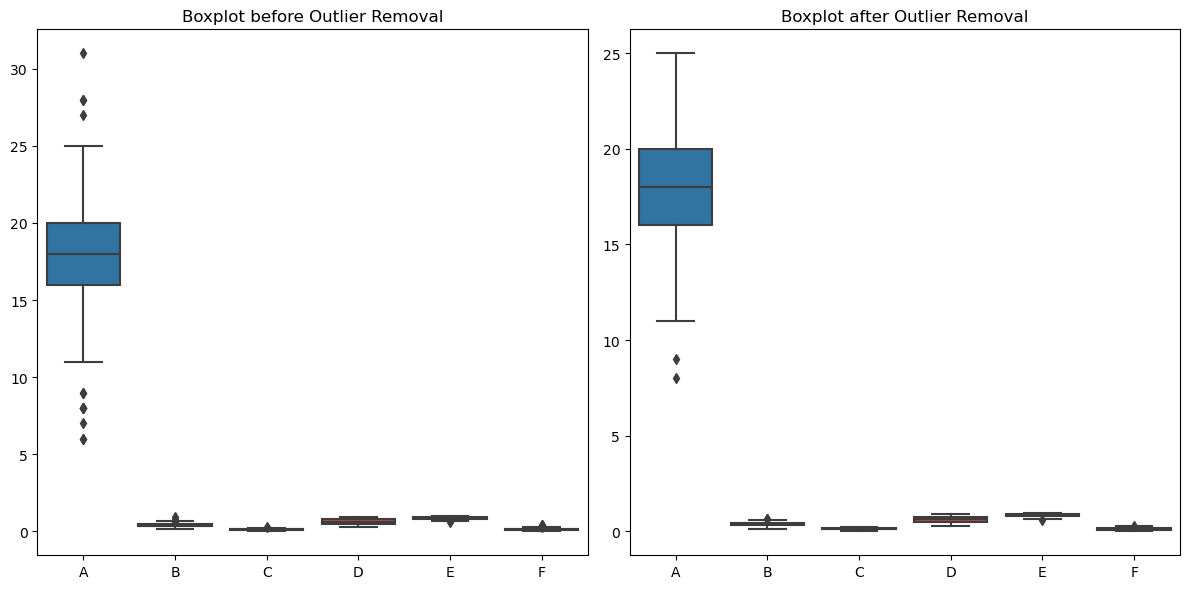

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop "NA" values from the DataFrame
df_cleaned = df.dropna()

# Set the quantile threshold
quantile_threshold = 0.99

# Identify the upper bound for each column based on the quantile
upper_bound_quantile = df_cleaned.quantile(quantile_threshold)

# Calculate the lower and upper bounds for each column based on IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the upper bound
outliers = (df_cleaned > upper_bound).any(axis=1)

# Remove rows with outliers
df_no_outliers = df_cleaned[~outliers]

# Plot boxplots before and after outlier removal
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned)
plt.title('Boxplot before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers)
plt.title('Boxplot after Outlier Removal')

plt.tight_layout()
plt.show()


Feature Ranking without outliers:
  Feature  Importance
2       D    0.275465
0       B    0.256516
1       C    0.221545
3       E    0.144173
4       F    0.102301


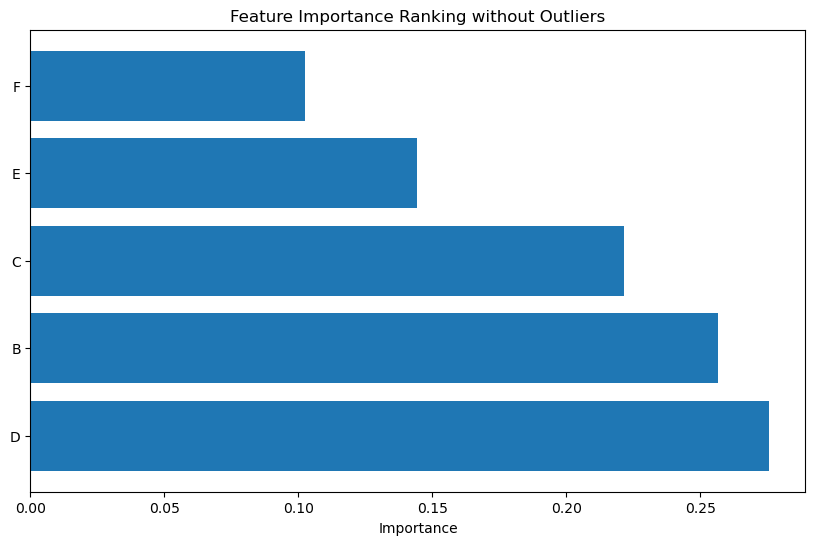

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming df_no_outliers is your DataFrame without outliers
# Separate the target variable (Column 'A') and features
target = 'A'
X_no_outliers = df_no_outliers.drop(target, axis=1)
y_no_outliers = df_no_outliers[target]

# Create a RandomForestRegressor model
model_no_outliers = RandomForestRegressor()

# Fit the model to the data without outliers
model_no_outliers.fit(X_no_outliers, y_no_outliers)

# Get feature importances from the model
feature_importances_no_outliers = model_no_outliers.feature_importances_

# Create a DataFrame to display feature importances
feature_ranking_no_outliers = pd.DataFrame({'Feature': X_no_outliers.columns, 'Importance': feature_importances_no_outliers})

# Sort features by importance in descending order
feature_ranking_no_outliers = feature_ranking_no_outliers.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Ranking without outliers:")
print(feature_ranking_no_outliers)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_no_outliers['Feature'], feature_ranking_no_outliers['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Ranking without Outliers')
plt.show()


these importance values suggest the contribution of each feature to the predictive power of the model. Features with higher importance values are considered more influential in predicting the target variable.

Mean Squared Error on the Test Set: 7.237886363636364


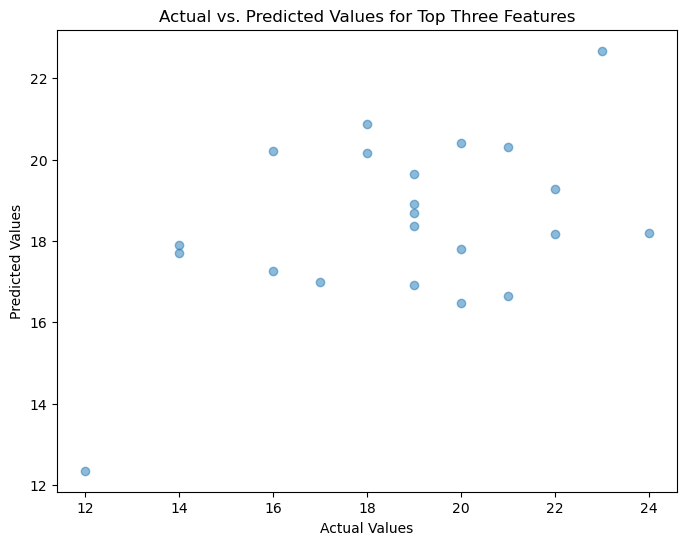

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df_no_outliers is your DataFrame without outliers
# Separate the target variable (Column 'A') and top three features
target = 'A'
top_three_features = ['D', 'B', 'C']  # Update with the top three features from your ranking
X_top_three = df_no_outliers[top_three_features]
y_top_three = df_no_outliers[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_three, y_top_three, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model_top_three = RandomForestRegressor()

# Fit the model to the training data
model_top_three.fit(X_train, y_train)

# Predict on the test set
y_pred = model_top_three.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the Test Set: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Top Three Features')
plt.show()
